<a href="https://colab.research.google.com/github/rasafarova/MirKva/blob/main/HOMEEscapeS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Сбор данных 

In [124]:
!pip install requests 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from time import sleep
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [126]:
url = "https://www.mirkvartir.ru/%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0/%D0%B1%D0%B5%D0%B7-%D0%BF%D0%BE%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2/"

In [127]:
r = requests.get(url)
r.text

'<!DOCTYPE html><html lang="ru"><head><meta charSet="utf-8"/><meta http-equiv="Content-Type" content="text/html; charset=utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5"/><meta name="format-detection" content="telephone=no"/><meta http-equiv="x-rim-auto-match" content="none"/><meta name="msapplication-config" content="none"/><link rel="preconnect" href="//www.googletagmanager.com" crossorigin=""/><link rel="preconnect" href="//www.google-analytics.com" crossorigin=""/><link rel="preconnect" href="//counter.yadro.ru" crossorigin=""/><link rel="preconnect" href="//mc.yandex.ru" crossorigin=""/><link rel="dns-prefetch" href="//i.mirkvartir.me"/><link rel="dns-prefetch" href="//api.mirkvartir.me"/><link rel="dns-prefetch" href="//f.mirkvartir.me"/><link rel="dns-prefetch" href="//f0.mirkvartir.me"/><link rel="dns-prefetch" href="//f1.mirkvartir.me"/><link rel="dns-prefetch" href="//f2.mirkvartir.me"/><link rel="dns-prefetch" href="//f3.mirkvartir

In [128]:
soup = BeautifulSoup(r.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="ru"><head><meta charset="utf-8"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/><meta content="telephone=no" name="format-detection"/><meta content="none" http-equiv="x-rim-auto-match"/><meta content="none" name="msapplication-config"/><link crossorigin="" href="//www.googletagmanager.com" rel="preconnect"/><link crossorigin="" href="//www.google-analytics.com" rel="preconnect"/><link crossorigin="" href="//counter.yadro.ru" rel="preconnect"/><link crossorigin="" href="//mc.yandex.ru" rel="preconnect"/><link href="//i.mirkvartir.me" rel="dns-prefetch"/><link href="//api.mirkvartir.me" rel="dns-prefetch"/><link href="//f.mirkvartir.me" rel="dns-prefetch"/><link href="//f0.mirkvartir.me" rel="dns-prefetch"/><link href="//f1.mirkvartir.me" rel="dns-prefetch"/><link href="//f2.mirkvartir.me" rel="dns-prefetch"/><link href="//f3.mirkvartir.me" rel="dns-prefe

In [129]:
soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF')

<div class="OffersListItem_bOffersListItem__Q0htF OffersListItem_mBigGallery__ta4tb"><div class="OffersListItem_overlabel__3pfEH">№ <!-- -->291-946-191 Премиум</div><div class="OfferGallery_bGallery__3aqOm OfferGallery_mBig__3JlyI"><div class="OfferGallery_bSlider__1FoDn"><div class="slick-initialized slick-slider"><div class="slick-list"><div class="slick-track"><div class="slick-slide" data-index="0"><a class="OfferGallery_bSlide__3PjeJ" href="https://www.mirkvartir.ru/291946191/" target="_self" title="3-комн., 92 м², 13/24 этаж"><picture><source media="(max-width: 760px) and (min-width: 360px)" srcset="https://f6.mirkvartir.me/480x360/d8/d85ef17c-71af-4eaf-ae1a-59b97e27cf71.jpg 1x, https://f6.mirkvartir.me/960x720/d8/d85ef17c-71af-4eaf-ae1a-59b97e27cf71.jpg 2x"/><source srcset="https://f6.mirkvartir.me/320x240/d8/d85ef17c-71af-4eaf-ae1a-59b97e27cf71.jpg 1x, https://f6.mirkvartir.me/640x480/d8/d85ef17c-71af-4eaf-ae1a-59b97e27cf71.jpg 2x"/><img alt="3-комн., 92 м², 13/24 этаж" height=

In [130]:
link = soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF').find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'OffersListItem_offerTitleContainer__2netd').find('a', class_ = 'OffersListItem_offerTitle__3GQ_0').get('href')
link
  


'https://www.mirkvartir.ru/291946191/'

In [131]:
name = soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF').find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'OffersListItem_offerTitleContainer__2netd').find('a', class_ = 'OffersListItem_offerTitle__3GQ_0').find('span').text
name

'3-комн., 92 м², 13/24 этаж'

In [132]:
room = int(re.sub(r'\D', '', soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF').find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'OffersListItem_offerTitleContainer__2netd').find('a', class_ = 'OffersListItem_offerTitle__3GQ_0').find('span').text.split(', ')[0]))
room

3

In [133]:
floor = int(re.findall(r'\d+', soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF').find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'OffersListItem_offerTitleContainer__2netd').find('a', class_ = 'OffersListItem_offerTitle__3GQ_0').find('span').text.split(', ')[2])[0])
floor


13

In [134]:
all_floors = int(re.findall(r'\d+', soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF').find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'OffersListItem_offerTitleContainer__2netd').find('a', class_ = 'OffersListItem_offerTitle__3GQ_0').find('span').text.split(', ')[2])[1])
all_floors

24

In [135]:
subway = soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF').find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'PlaceAround_bPlaceAround__3PkbI PlaceAround_mMarginRight__yP2H8 PlaceAround_mMobileOnDark__3Jk-Q').find('a', class_ = 'PlaceAround_place__Q1I6i PlaceAround_MoscowSubway__24fO2').find('span').text

subway

'Крестьянская Застава'

In [136]:
try:
    sub_time = int(re.findall(r'\d+', soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF').find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'PlaceAround_bPlaceAround__3PkbI PlaceAround_mMarginRight__yP2H8 PlaceAround_mMobileOnDark__3Jk-Q').find('span', class_ = 'PlaceAround_distance__1IvhU PlaceAround_Go__3LMH0').text)[0])
except:
    sub_time = '-'
    
sub_time


3

In [137]:
address = soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF').find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = "OfferAddress_address__2O-MU").text
address

'Москва, ул. Мельникова, 3к1'

In [138]:
description = soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF').find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = "OffersListItem_infoText__1jjI7").text
description

'Предлагается в продажу недорогая и теплая 3-комнатная квартира на вторичном рынке общей площадью- 92 кв. м., раздельный санузел, пластиковые окна на две стороны, с косметическим ремонтом. Дом стоит в тихом районе, рядом ТЦ и кинотеатр. Адрес: Москва, Мельникова.'

In [139]:
price = int(''.join(re.findall(r'\d+',soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF').find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_rightContainer__B0OAY').find('div', class_ = 'OfferPrice_offerPrice__2kzn3').find('span', class_ = 'OfferPrice_price__1jdEj').find('span').text)))
price

36500000

In [140]:
data = []
for p in range(1, 120):
    print(p)
    
    url = f'https://www.mirkvartir.ru/%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0/%D0%B1%D0%B5%D0%B7-%D0%BF%D0%BE%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2/?p={p}'
    r = requests.get(url)
    sleep(3)
    soup = BeautifulSoup(r.text, 'lxml')
    
    flats = soup.findAll('div', class_ = 'OffersListItem_bOffersListItem__Q0htF')
    

    for flat in flats:
        try:
            link = flat.find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'OffersListItem_offerTitleContainer__2netd').find('a', class_ = 'OffersListItem_offerTitle__3GQ_0').get('href')
        except:
            link = '-'
        try:
            room = int(re.sub(r'\D', '', flat.find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'OffersListItem_offerTitleContainer__2netd').find('a', class_ = 'OffersListItem_offerTitle__3GQ_0').find('span').text.split(', ')[0]))
        except:
            room = '-'
        try:
            area = float(re.sub(r'[^\d\.]', '', flat.find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'OffersListItem_offerTitleContainer__2netd').find('a', class_ = 'OffersListItem_offerTitle__3GQ_0').find('span').text.split(', ')[1]))
        except:
            area = '-'
        try:
            floor = int(re.findall(r'\d+', flat.find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'OffersListItem_offerTitleContainer__2netd').find('a', class_ = 'OffersListItem_offerTitle__3GQ_0').find('span').text.split(', ')[2])[0])
        except:
            floor = '-'   
        try: 
            all_floors = int(re.findall(r'\d+', flat.find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'OffersListItem_offerTitleContainer__2netd').find('a', class_ = 'OffersListItem_offerTitle__3GQ_0').find('span').text.split(', ')[2])[1])
        except:
            all_floors = '-'
        try:
            subway = flat.find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'PlaceAround_bPlaceAround__3PkbI PlaceAround_mMarginRight__yP2H8 PlaceAround_mMobileOnDark__3Jk-Q').find('a', class_ = 'PlaceAround_place__Q1I6i PlaceAround_MoscowSubway__24fO2').find('span').text
        except:
            subway = '-'
        try:
            sub_time = int(re.findall(r'\d+', soup.find("div", class_= 'OffersListItem_bOffersListItem__Q0htF').find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = 'PlaceAround_bPlaceAround__3PkbI PlaceAround_mMarginRight__yP2H8 PlaceAround_mMobileOnDark__3Jk-Q').find('span', class_ = 'PlaceAround_distance__1IvhU PlaceAround_Go__3LMH0').text)[0])
        except:
            sub_time = '-'
        try:
            address = flat.find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_content__2LDEz').find('div', class_ = "OfferAddress_address__2O-MU").text
        except:
            address = '-'
        try:
            price = int(''.join(re.findall(r'\d+',flat.find('div', class_ = 'OffersListItem_infoContainer__1xyCn').find('div', class_= 'OffersListItem_rightContainer__B0OAY').find('div', class_ = 'OfferPrice_offerPrice__2kzn3').find('span', class_ = 'OfferPrice_price__1jdEj').find('span').text)))
        except:
            price = '-'
    
    
        data.append([link, room, area, floor, all_floors, subway, sub_time, address, price])
     

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


In [141]:
data

[['https://www.mirkvartir.ru/291946191/',
  3,
  92.0,
  13,
  24,
  'Крестьянская Застава',
  3,
  'Москва, ул. Мельникова, 3к1',
  36500000],
 ['https://www.mirkvartir.ru/298595689/',
  1,
  13.9,
  7,
  10,
  'Селигерская',
  3,
  'Москва, Дегунинская ул., 10к4',
  4950000],
 ['https://www.mirkvartir.ru/298796478/',
  2,
  50.1,
  19,
  23,
  'Университет',
  3,
  'Москва, Мичуринский пр-кт, 13к1',
  24000000],
 ['https://www.mirkvartir.ru/298523160/',
  2,
  53.7,
  5,
  16,
  'Озёрная',
  3,
  'Москва, ул. Академика Анохина, 38к3',
  14700000],
 ['https://www.mirkvartir.ru/298523096/',
  3,
  80.0,
  29,
  40,
  'Новые Черемушки',
  3,
  'Москва, Профсоюзная ул., 64к2',
  45900000],
 ['https://www.mirkvartir.ru/298708893/',
  2,
  71.1,
  4,
  15,
  'Коломенская',
  3,
  'Москва, пр-кт Лихачева, 14',
  29700000],
 ['https://www.mirkvartir.ru/298708916/',
  1,
  31.6,
  4,
  22,
  'Новохохловская',
  3,
  'Москва, проезд Грайвороновский 1-й, 10',
  10000000],
 ['https://www.mirkvar

In [142]:
header = ['link', 'room', 'area', 'floor', 'all_floors', 'subway', 'sub_time', 'address', 'price']

In [143]:
df = pd.DataFrame(data, columns = header)
df.to_csv('dataМirKva.csv', sep = ';', encoding = 'utf8')

# 2. Предварительная обработка 

Чтобы получить данные, мы использовали сайт: https://www.mirkvartir.ru/Москва/без-посредников/.

Основной критерий отбора - покупка квартиры в Москве у собственника , без посредников или агентств.

На выходе мы получили следующие переменные:

- Link - ссылка на конкретное объявление о продаже квартиры
- Name - наименование в объявлении (кол-во комнат, метраж, этаж)
позднее такую переменную убрали и разделили наименование на 3 признака для дальнейшего исследования.

- room - количество комнат в квартире

- area (m^2) - метраж конкретной квартиры

- floor - этаж

- subway - станции метро ,в районе которых располагается квартира

- sub_time - расстояние от квартиры до метро

- address - адрес

- price - стоимость квартиры-

In [144]:
df

,link,room,area,floor,all_floors,subway,sub_time,address,price
0,https://www.mirkvartir.ru/291946191/,3,92.0,13,24,Крестьянская Застава,3,"Москва, ул. Мельникова, 3к1",36500000
1,https://www.mirkvartir.ru/298595689/,1,13.9,7,10,Селигерская,3,"Москва, Дегунинская ул., 10к4",4950000
2,https://www.mirkvartir.ru/298796478/,2,50.1,19,23,Университет,3,"Москва, Мичуринский пр-кт, 13к1",24000000
3,https://www.mirkvartir.ru/298523160/,2,53.7,5,16,Озёрная,3,"Москва, ул. Академика Анохина, 38к3",14700000
4,https://www.mirkvartir.ru/298523096/,3,80.0,29,40,Новые Черемушки,3,"Москва, Профсоюзная ул., 64к2",45900000
...,...,...,...,...,...,...,...,...,...
2969,https://www.mirkvartir.ru/299587127/,3,58.8,2,9,Пражская,13,"Москва, Кировоградская ул., 24к2",15000000
2970,https://www.mirkvartir.ru/299587133/,2,53.8,1,16,Проспект Вернадского,13,"Москва, Ленинский пр-кт, 95к4",14900000
2971,https://www.mirkvartir.ru/299063479/,2,69.5,23,39,Черкизовская,13,"Москва, Амурская ул., 3стр10",17500000
2972,https://www.mirkvartir.ru/302769913/,4,90.4,2,10,Ленинский Проспект,13,"Москва, ул. Шверника, 7",32000000


In [145]:
df.replace('-', np.nan, inplace=True)
df


,link,room,area,floor,all_floors,subway,sub_time,address,price
0,https://www.mirkvartir.ru/291946191/,3.0,92.0,13.0,24.0,Крестьянская Застава,3.0,"Москва, ул. Мельникова, 3к1",36500000
1,https://www.mirkvartir.ru/298595689/,1.0,13.9,7.0,10.0,Селигерская,3.0,"Москва, Дегунинская ул., 10к4",4950000
2,https://www.mirkvartir.ru/298796478/,2.0,50.1,19.0,23.0,Университет,3.0,"Москва, Мичуринский пр-кт, 13к1",24000000
3,https://www.mirkvartir.ru/298523160/,2.0,53.7,5.0,16.0,Озёрная,3.0,"Москва, ул. Академика Анохина, 38к3",14700000
4,https://www.mirkvartir.ru/298523096/,3.0,80.0,29.0,40.0,Новые Черемушки,3.0,"Москва, Профсоюзная ул., 64к2",45900000
...,...,...,...,...,...,...,...,...,...
2969,https://www.mirkvartir.ru/299587127/,3.0,58.8,2.0,9.0,Пражская,13.0,"Москва, Кировоградская ул., 24к2",15000000
2970,https://www.mirkvartir.ru/299587133/,2.0,53.8,1.0,16.0,Проспект Вернадского,13.0,"Москва, Ленинский пр-кт, 95к4",14900000
2971,https://www.mirkvartir.ru/299063479/,2.0,69.5,23.0,39.0,Черкизовская,13.0,"Москва, Амурская ул., 3стр10",17500000
2972,https://www.mirkvartir.ru/302769913/,4.0,90.4,2.0,10.0,Ленинский Проспект,13.0,"Москва, ул. Шверника, 7",32000000


In [146]:
print(df.dtypes)

link           object
room          float64
area          float64
floor         float64
all_floors    float64
subway         object
sub_time      float64
address        object
price           int64
dtype: object


In [147]:
df.isnull().sum()

link            0
room          130
area            0
floor           7
all_floors      7
subway         92
sub_time      600
address         0
price           0
dtype: int64

In [160]:
mean_X = df['sub_time'].mean().round(2)
df['sub_time'] = df['sub_time'].fillna(mean_X) # замена на среднее
df = df.sort_values('price') # сортировка по возрастанию 
df

,link,room,area,floor,all_floors,subway,sub_time,address,price
2381,https://www.mirkvartir.ru/302569747/,1.0,17.3,1.0,5.0,Волжская,15.0,"Москва, ул. Чугунные Ворота, 3к1",2200000
525,https://www.mirkvartir.ru/302569747/,1.0,17.3,1.0,5.0,Волжская,15.0,"Москва, ул. Чугунные Ворота, 3к1",2200000
2053,https://www.mirkvartir.ru/302569747/,1.0,17.3,1.0,5.0,Волжская,15.0,"Москва, ул. Чугунные Ворота, 3к1",2200000
1096,https://www.mirkvartir.ru/301424571/,1.0,26.0,2.0,4.0,Спартак,8.0,"Москва, Волоколамское ш., 116",3990000
1609,https://www.mirkvartir.ru/302479639/,1.0,10.3,1.0,5.0,Зорге,13.0,"Москва, ул. Маршала Конева, 27",4200000
...,...,...,...,...,...,...,...,...,...
43,https://www.mirkvartir.ru/294281252/,6.0,280.0,13.0,65.0,Кутузовская,7.0,"Москва, Краснопресненская наб., 14Ак1",250000000
1916,https://www.mirkvartir.ru/269329353/,4.0,240.0,2.0,5.0,Арбатская,20.0,"Москва, пер. 2-й Зачатьевский, 11",270000000
935,https://www.mirkvartir.ru/299703705/,4.0,175.0,3.0,8.0,Ленинский Проспект,16.0,"Москва, ул. Ефремова, 19к3",310000000
2222,https://www.mirkvartir.ru/295595334/,4.0,220.0,9.0,14.0,Маяковская,20.0,"Москва, пер. Капранова, 4",420252249


In [161]:
df.shape

(2844, 9)

Cейчас таблица содержит 2844 строк (объектов) и 9 столбцов (признаков), проверим сколько уникальных значений


In [162]:
df.nunique()

link          1925
room            12
area           725
floor           38
all_floors      53
subway         141
sub_time        18
address       1702
price          587
dtype: int64

In [163]:
df_unique = df.drop_duplicates(subset='link')
df_unique

,link,room,area,floor,all_floors,subway,sub_time,address,price
2381,https://www.mirkvartir.ru/302569747/,1.0,17.3,1.0,5.0,Волжская,15.00,"Москва, ул. Чугунные Ворота, 3к1",2200000
1096,https://www.mirkvartir.ru/301424571/,1.0,26.0,2.0,4.0,Спартак,8.00,"Москва, Волоколамское ш., 116",3990000
1609,https://www.mirkvartir.ru/302479639/,1.0,10.3,1.0,5.0,Зорге,13.00,"Москва, ул. Маршала Конева, 27",4200000
2579,https://www.mirkvartir.ru/301119714/,1.0,19.4,1.0,17.0,Царицыно,10.00,"Москва, Каширское ш., 57к7",4410000
1030,https://www.mirkvartir.ru/301115981/,1.0,16.7,1.0,5.0,Спартак,13.98,"Москва, Волоколамское ш., 116стр7",4500000
...,...,...,...,...,...,...,...,...,...
43,https://www.mirkvartir.ru/294281252/,6.0,280.0,13.0,65.0,Кутузовская,7.00,"Москва, Краснопресненская наб., 14Ак1",250000000
1916,https://www.mirkvartir.ru/269329353/,4.0,240.0,2.0,5.0,Арбатская,20.00,"Москва, пер. 2-й Зачатьевский, 11",270000000
935,https://www.mirkvartir.ru/299703705/,4.0,175.0,3.0,8.0,Ленинский Проспект,16.00,"Москва, ул. Ефремова, 19к3",310000000
2222,https://www.mirkvartir.ru/295595334/,4.0,220.0,9.0,14.0,Маяковская,20.00,"Москва, пер. Капранова, 4",420252249


Итак, таблица содержит 1925 строк (объектов) и 9 столбцов (признаков), включая выходной (целевой) признак и еще один с ссылкой на квартиру.
Проверим по остальным признакам, сколько значений NaN и уберем их

In [164]:
df_unique.isnull().sum()

link           0
room           0
area           0
floor          6
all_floors     6
subway        60
sub_time       0
address        0
price          0
dtype: int64

In [167]:
df_unique.dropna(subset=['subway', 'floor', 'all_floors'], inplace=True)

<ipython-input-167-e56424907c7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.dropna(subset=['subway', 'floor', 'all_floors'], inplace=True)


In [166]:
df_unique.isnull().sum()

link          0
room          0
area          0
floor         0
all_floors    0
subway        0
sub_time      0
address       0
price         0
dtype: int64

In [168]:
df_unique.shape

(1859, 9)

In [169]:
df_unique.dtypes

link           object
room          float64
area          float64
floor         float64
all_floors    float64
subway         object
sub_time      float64
address        object
price           int64
dtype: object

Создадим столбец с данными о лифте, лифт должен быть во всех зданиях выше 5 этажа

In [180]:
df_unique['elevator'] = df_unique['floor'].apply(lambda x: 'да' if x > 5 else 'нет')
df_unique.head()

<ipython-input-180-5e35071dbd0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['elevator'] = df_unique['floor'].apply(lambda x: 'да' if x > 5 else 'нет')


,link,room,area,floor,all_floors,subway,sub_time,address,price,price_per_sqm,elevator
2381,https://www.mirkvartir.ru/302569747/,1.0,17.3,1.0,5.0,Волжская,15.00,"Москва, ул. Чугунные Ворота, 3к1",2200000,127167.630058,нет
1096,https://www.mirkvartir.ru/301424571/,1.0,26.0,2.0,4.0,Спартак,8.00,"Москва, Волоколамское ш., 116",3990000,153461.538462,нет
1609,https://www.mirkvartir.ru/302479639/,1.0,10.3,1.0,5.0,Зорге,13.00,"Москва, ул. Маршала Конева, 27",4200000,407766.990291,нет
2579,https://www.mirkvartir.ru/301119714/,1.0,19.4,1.0,17.0,Царицыно,10.00,"Москва, Каширское ш., 57к7",4410000,227319.587629,нет
1030,https://www.mirkvartir.ru/301115981/,1.0,16.7,1.0,5.0,Спартак,13.98,"Москва, Волоколамское ш., 116стр7",4500000,269461.077844,нет


# 3. Визуализация 

Наши предположения:
- Чем ближе квартира расположена к центру Москвы, тем выше ее стоимость.
- Квартиры на высоких этажах дороже, чем на низких.
- Квартиры с большим количеством комнат имеют более высокую стоимость.
- Квартиры на первом этаже дешевле, чем на остальных этажах.
- Квартиры в районах с развитой инфраструктурой (школы, магазины, транспортная доступность) имеют более высокую стоимость.
- Квартиры в домах с лифтом дороже, чем в домах без лифта.

 Для подтверждения или опровержения гипотезы о зависимости стоимости квартиры от ее расположения можно использовать scatter plot с координатами широты и долготы квартиры и ее стоимости. Если гипотеза верна, то на графике будет наблюдаться положительная корреляция между стоимостью квартиры и ее удаленностью от центра Москвы.(сделаем позже)

 Для проверки гипотезы о зависимости стоимости квартиры от этажа можно использовать box plot, который покажет разброс стоимости квартир на первом этаже и на остальных этажах. Если гипотеза верна, то медиана стоимости квартир на первом этаже будет ниже, чем на остальных этажах.

 Для проверки гипотезы о зависимости стоимости квартиры от инфраструктуры района можно использовать bar plot, который покажет среднюю стоимость квадратного метра в квартирах в районах с разной развитой инфраструктурой. Если гипотеза верна, то на графике будет наблюдаться положительная корреляция между стоимостью квадратного метра и уровнем развития инфраструктуры.

 Для проверки гипотезы о зависимости стоимости квартиры от наличия лифта можно использовать box plot, который покажет разброс стоимости квартир в домах с лифтом и без лифта. Если гипотеза верна, то медиана стоимости квартир в домах с лифтом будет выше, чем в домах без лифта.


Для проверки гипотезы о зависимости стоимости квартиры от количества комнат можно использовать bar plot, который покажет среднюю стоимость квадратного метра в квартирах с разным количеством комнат. Если гипотеза верна, то на графике будет наблюдаться положительная корреляция между стоимостью квадратного метра и количеством комнат.

In [175]:
df_unique['price_per_sqm'] = df_unique['price'] / df_unique['area']
mean_price_per_sqm = df_unique['price_per_sqm'].mean()
print('Средняя стоимость квартиры за квадратный метр:', mean_price_per_sqm)

Средняя стоимость квартиры за квадратный метр: 341676.2409678102


<ipython-input-175-19db28ead0ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['price_per_sqm'] = df_unique['price'] / df_unique['area']


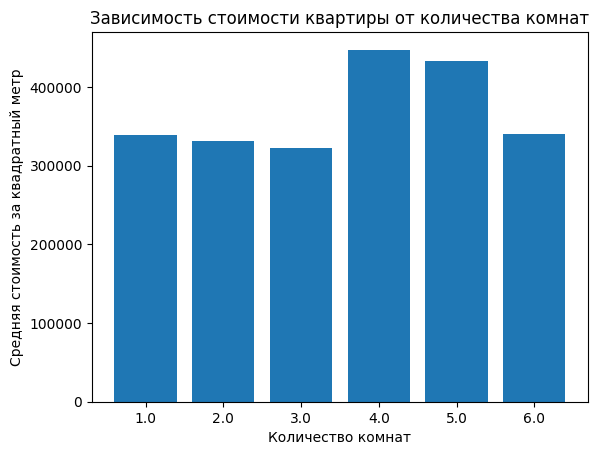

In [176]:
mean_price = df_unique.groupby('room')['price_per_sqm'].mean()
x = np.arange(len(mean_price))
plt.bar(x, mean_price)
plt.xticks(x, mean_price.index)
plt.xlabel('Количество комнат')
plt.ylabel('Средняя стоимость за квадратный метр')
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.show()

Для проверки гипотезы о зависимости стоимости квартиры от этажа можно использовать box plot, который покажет разброс стоимости квартир на разных этажах. Если гипотеза верна, то медиана стоимости квартир на высоких этажах будет выше, чем на низких.

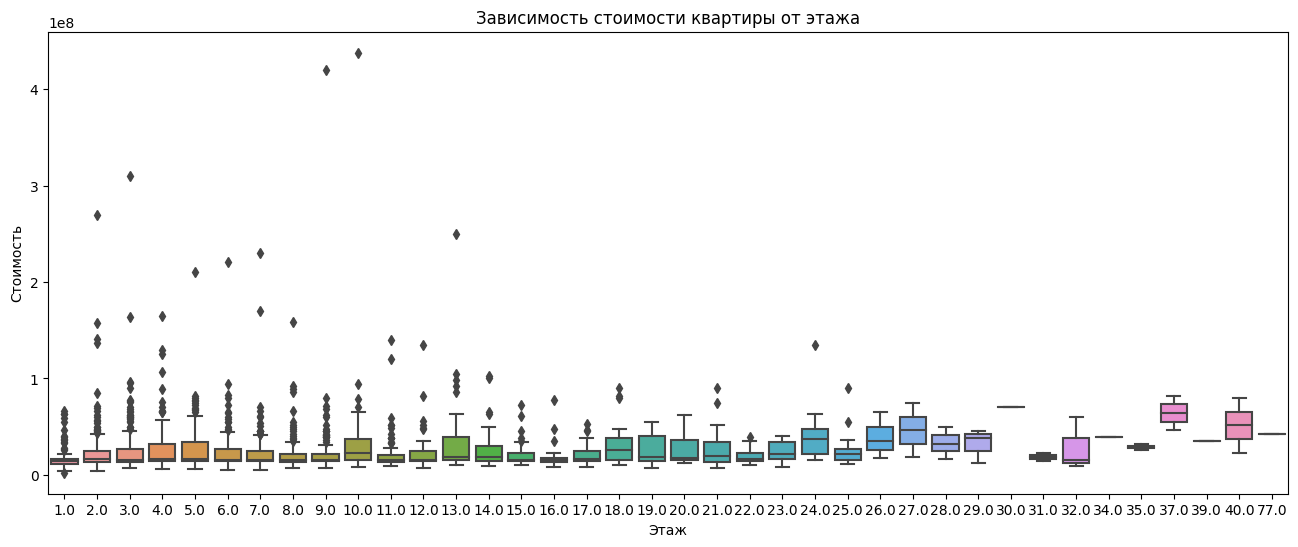

In [178]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='floor', y='price', data=df_unique)
plt.xlabel('Этаж')
plt.ylabel('Стоимость')
plt.title('Зависимость стоимости квартиры от этажа')
plt.show()

**Вывод:** Наше предположение не подтвердилось. 

Для проверки гипотезы о зависимости стоимости квартиры от наличия лифта можно использовать box plot, который покажет разброс стоимости квартир в домах с лифтом и без лифта. Если гипотеза верна, то медиана стоимости квартир в домах с лифтом будет выше, чем в домах без лифта.


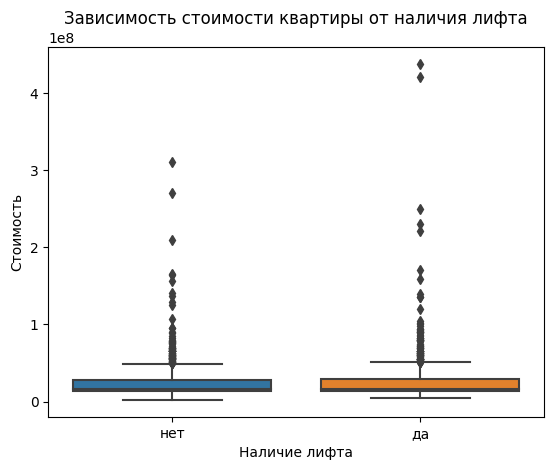

In [182]:
sns.boxplot(x='elevator', y='price', data=df_unique)
plt.xlabel('Наличие лифта')
plt.ylabel('Стоимость')
plt.title('Зависимость стоимости квартиры от наличия лифта')
plt.show()